In [1]:
""" Code taken from:
https://click.endnote.com/viewer?doi=10.1016%2Fj.cpc.2018.02.004&token=WzI1MTkzMTMsIjEwLjEwMTYvai5jcGMuMjAxOC4wMi4wMDQiXQ.Me0dEpnjbzi1YczwpCuoLJWfP9A
"""

## Import packages
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from scipy import fftpack

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

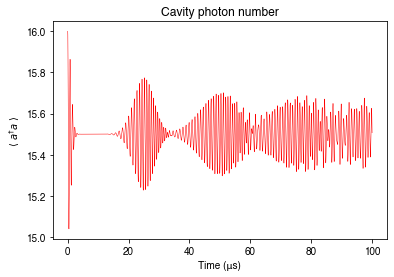

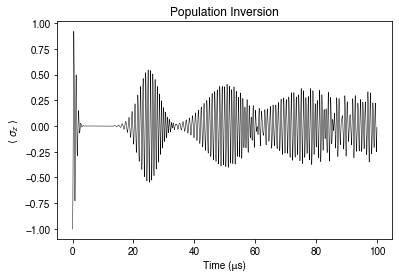

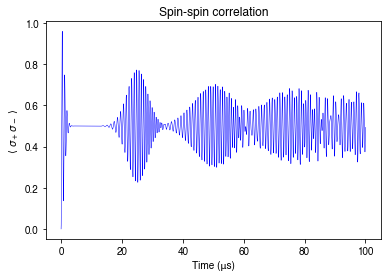

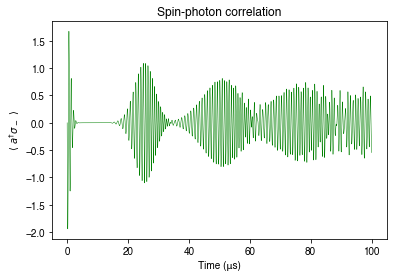

In [2]:
## Dimensional operators
cav_dim = 40 # types of photons there can exist (thermal or participaitn gin excitation)
atm_dim = 2 # energy levels in atom, 2 for TLS
I_cav = qeye(cav_dim) # identity matrix matching dimension of radiation field
I_atom = qeye(atm_dim) # identity matrix matching dimension of spin system

## Atomic spin system operators
sigmap = tensor(sigmap(), I_cav)
sigmam = tensor(sigmam(), I_cav)
sigmaz = tensor(sigmaz(), I_cav)

## Photon operators
adag = tensor(I_atom, create(cav_dim)) # order of arguments is important and is consistant with the spin operators                
a = tensor(I_atom, destroy(cav_dim))

## Physical constants
w = 2 * np.pi * 1.45e3 # cavity frequency with vacuum field energy set to zero (zero-point energy) (MHz)
g = 1.0 #2 * np.pi * 1.1 # test spin-photon couling strength ~ np.sqrt(tls_num)*g, experimetnally it's 1.1 though. 

## Initial quantum states
psi_atm = basis(2, 1) # atom initially stat in ground state
#psi_phot = coherent(cav_dim, np.sqrt(16)) # exactly 16 photons in the cavity out of a possible 40
psi_phot = coherent(cav_dim, np.sqrt(16)) # exactly 16 photons in the cavity out of a possible 40
psi0 = tensor(psi_atm, psi_phot)

## Assembling the Hamiltonian
#H = (adag*a) + g*(sigmap * a + sigmam * adag)
H = g*(sigmap * a + sigmam * adag)

## simulation duration and master equation solver
time = 100
steps = 3000
tlist = np.linspace(0, time, steps)
result = sesolve(H, psi0, tlist, e_ops = [adag*a, sigmaz, sigmap*sigmam, adag*sigmam], options=Options(nsteps=10000))

## Visualization 
plt.figure(1)
plt.plot(tlist, result.expect[0], 'r', linewidth=0.5)
plt.title('Cavity photon number')
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('adag a.png', format = 'png', dpi = 900) 

plt.figure(2)
plt.plot(tlist, result.expect[1], 'k', linewidth=0.5)
plt.title('Population Inversion')
plt.ylabel(r'$\langle\ \sigma_z \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('sigmaz.png', format = 'png', dpi = 900) 

plt.figure(3)
plt.plot(tlist, result.expect[2], 'b', linewidth=0.5)
plt.title('Spin-spin correlation')
plt.ylabel(r'$\langle\ \sigma_+ \sigma_- \ \rangle$',)
plt.xlabel('Time (μs)')
plt.savefig('sigmap sigmam.png', format = 'png', dpi = 900) 

plt.figure(4)
plt.plot(tlist, result.expect[3].imag, 'g', linewidth=0.5)
plt.title('Spin-photon correlation')
plt.ylabel(r'$\langle\ a^\dag \sigma_- \ \rangle$')
plt.xlabel('Time (μs)')
plt.savefig('adag sigmam.png', format = 'png', dpi = 900) 

plt.show()




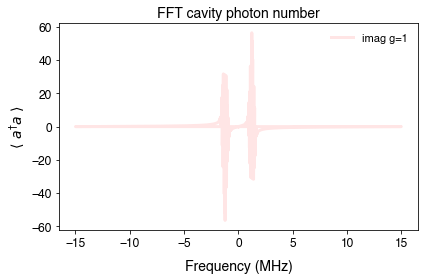

In [3]:
y1 = fftpack.fft(result.expect[0])
xf = fftpack.fftfreq(result.expect[0].size, d=time/steps) # takes window length and inverse of sampling rate as input

plt.figure(2)
#plt.plot(xf, y1.real, color='r', linestyle='-', linewidth=3, alpha=0.1, label='real g=1')
plt.plot(xf, y1.imag, color='r', linestyle='-', linewidth=3, alpha=0.1, label='imag g=1')
plt.title('FFT cavity photon number', fontsize = 14)
plt.ylabel(r'$\langle\ a^\dag a \ \rangle$', fontsize = 14)
plt.xlabel('Frequency (MHz)', labelpad = 10, fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fancybox=False, edgecolor='w', fontsize=11)
plt.tight_layout()

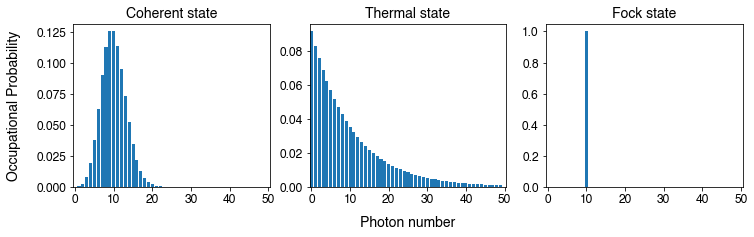

In [64]:
N = 50
rho_coherent = coherent_dm(N, np.sqrt(10))
rho_thermal = thermal_dm(N, 10)
rho_fock = fock_dm(N, 10)
fig, axes = plt.subplots(1, 3, figsize=(12,3))
axes[0].bar(np.arange(0, N), rho_coherent.diag())
axes[0].set_title("Coherent state", fontsize=14)
axes[0].set_xlim([-.5, N+0.5])
axes[0].set_ylabel('Occupational Probability', labelpad = 15, fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].set_xticks(np.arange(0, N+1, 10))
axes[1].bar(np.arange(0, N), rho_thermal.diag())
axes[1].set_title("Thermal state", fontsize=14)
axes[1].set_xlim([-.5, N+0.5])
axes[1].set_xlabel('Photon number', labelpad = 10, fontsize=14)
axes[1].set_xticks(np.arange(0, N+1, 10))
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[2].bar(np.arange(0, N), rho_fock.diag())
axes[2].set_title("Fock state", fontsize=14)
axes[2].set_xlim([-.5, N+0.5])
axes[2].set_xticks(np.arange(0, N+1, 10))
axes[2].tick_params(axis='both', which='major', labelsize=12)
plt.show()



In [ ]:
## http://qutip.org/docs/4.1/guide/guide-visualization.html

In [8]:
l = coherent(20, np.sqrt(2))
ket2dm(l)

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[1.35335283e-01 1.91392993e-01 1.91392993e-01 1.56271724e-01
  1.10500796e-01 6.98868398e-02 4.03491857e-02 2.15675470e-02
  1.07837735e-02 5.08351958e-03 2.27341907e-03 9.69389148e-04
  3.95751461e-04 1.55226500e-04 5.86700746e-05 2.14234099e-05
  7.57376745e-06 2.60000615e-06 8.58282754e-07 3.08010987e-07]
 [1.91392993e-01 2.70670566e-01 2.70670566e-01 2.21001592e-01
  1.56271724e-01 9.88349166e-02 5.70623657e-02 3.05011175e-02
  1.52505587e-02 7.18918233e-03 3.21510008e-03 1.37092328e-03
  5.59677084e-04 2.19523421e-04 8.29720152e-05 3.02972768e-05
  1.07109247e-05 3.67696396e-06 1.21379511e-06 4.35593316e-07]
 [1.91392993e-01 2.70670566e-01 2.70670566e-01 2.21001592e-01
  1.56271724e-01 9.88349166e-02 5.70623657e-02 3.05011175e-02
  1.52505587e-02 7.18918233e-03 3.21510008e-03 1.37092328e-03
  5.59677084e-04 2.19523421e-04 8.29720152e-05 3.02972768e-05
  1.07109247e-05 3.67696396e-06 1.21

In [9]:
rho_coherent

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[1.35335283e-01 1.91392993e-01 1.91392993e-01 1.56271724e-01
  1.10500796e-01 6.98868398e-02 4.03491857e-02 2.15675470e-02
  1.07837735e-02 5.08351958e-03 2.27341907e-03 9.69389148e-04
  3.95751461e-04 1.55226500e-04 5.86700746e-05 2.14234099e-05
  7.57376745e-06 2.60000615e-06 8.58282754e-07 3.08010987e-07]
 [1.91392993e-01 2.70670566e-01 2.70670566e-01 2.21001592e-01
  1.56271724e-01 9.88349166e-02 5.70623657e-02 3.05011175e-02
  1.52505587e-02 7.18918233e-03 3.21510008e-03 1.37092328e-03
  5.59677084e-04 2.19523421e-04 8.29720152e-05 3.02972768e-05
  1.07109247e-05 3.67696396e-06 1.21379511e-06 4.35593316e-07]
 [1.91392993e-01 2.70670566e-01 2.70670566e-01 2.21001592e-01
  1.56271724e-01 9.88349166e-02 5.70623657e-02 3.05011175e-02
  1.52505587e-02 7.18918233e-03 3.21510008e-03 1.37092328e-03
  5.59677084e-04 2.19523421e-04 8.29720152e-05 3.02972768e-05
  1.07109247e-05 3.67696396e-06 1.21